# TD4 Réseaux neuronaux

## 1. Simple population des neurones de taux 

Considérons une population de neurones décrits par leur taux de décharge moyen $r$. La population reçoit un input externe de force $I$. La dynamique du taux de décharge est donnée par 
$$\tau \frac{dr}{dt} = -r + \Phi(I).$$
La fonction de transfert suit un sigmoïde 
$$\Phi (x) = \frac{r_{\rm max}}{1 + \exp(−\beta(x − T))}.$$
<img src="Single_population.png" style="width: 200px;"/>
Considérons les paramètres: $\beta=0.2$, $r_{\rm max} = 100$, $T=40$.

### E1 Calculer analytiquement les points fixes du système. 
Les points fixes sont les points où la dérivée temporelle est égale à zéro, $ \frac{dr}{dt} = 0$, c'est-à-dire que le système est au repos. Combien de points fixes le système a-t-il? Tracer les points fixes en fonction de l'input externe $I$. Ce qui se passe si $\beta$ ou $T$ sont modifiés? Quelles propriétés du neurone sont incarnées par $\beta$ et $T$? 

### Solution E1
$$\frac{dr}{dt} = 0 = - r + \frac{r_{max}}{1 + \exp(−\beta(I − T))}$$
$$ r_0 = \frac{r_{max}}{1 + \exp(−\beta(I − T))}$$
Un point fixe pour chaque valeur de $I$. 

Text(0.5,0,'$I$')

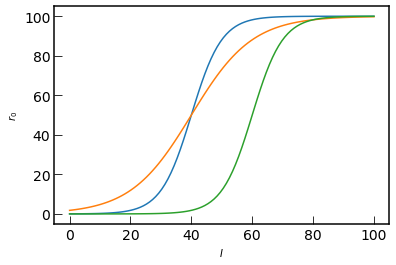

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

rmax = 100.
beta1 = 0.2
beta2 = 0.1
T1 = 40.
T2 = 60.

I = np.linspace(0,100,100)
r0 = lambda x,t,b: rmax/(1.+np.exp(-b*(x-t)))

plt.plot(I,r0(I,T1,beta1))
plt.plot(I,r0(I,T1,beta2))
plt.plot(I,r0(I,T2,beta1))
plt.ylabel('$r_0$')
plt.xlabel('$I$')


$\beta$ est le gain de la population. $T$ est le seuil d'activation. 

## 2. Population de neurones excitateurs avec autapse

Considérons une population de neurones excitateurs décrits par leur taux de décharge moyen $r$. La population reçoit un apport externe de force I et se projette sur elle-même. La puissance de l'entrée récurrente est contrôlée par $J$. La dynamique du taux de décharge est donnée par 
$$\tau \frac{dr_E}{dt} = -r_E+ \Phi(r_E J_{EE}  + I).$$ 
La fonction de transfert suit un sigmoïde 
$$\Phi (x) = \frac{r_{\rm max}}{1 + \exp(−\beta(x − T))}.$$
<img src="E_population.png" style="width: 200px;"/>
Considérons les paramètres: $I=0$, $\beta=0.5$, $r_{\rm max} = 1$, $T=10$.

### E2 Analyse graphique des points fixes. 
Tracez $dr_E/dt$ en fonction de $r_E$ pour les valeurs suivantes de $J=0,10,16,20$ et $30$. D'après ce graph: Comment la nature (stable, instable) et le nombre de points fixes évoluent-ils? 

### Solution E2


Text(0.5,0,'$r$')

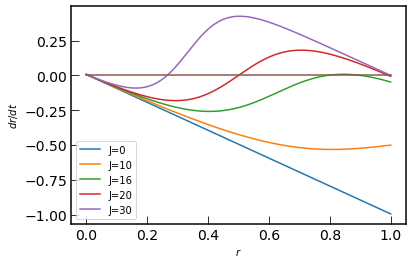

In [5]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

rmax = 1.
beta = 0.5
T = 10.
J = 1.
I = 0.

r = np.linspace(0,1,1000)
drdt = lambda r,J: -r + rmax/(1.+np.exp(-beta*(J*r+I-T)))


plt.plot(r,drdt(r,0),label='J=0')
plt.plot(r,drdt(r,10),label='J=10')
plt.plot(r,drdt(r,16),label='J=16')
plt.plot(r,drdt(r,20),label='J=20')
plt.plot(r,drdt(r,30),label='J=30')

plt.legend()

plt.plot(r,np.zeros(len(r)))
plt.ylabel('$dr/dt$')
plt.xlabel('$r$')

La population a un point fixe à $r_E \approx 0$. Pour les valeurs de $J = 16$ et plus, la population a trois points fixes. Les points extrêmes à $r_E\approx0$ et grand $r_E$ sont stables. Le point fixe entre les deux est instable. 

Le diagramme de bifurcation ci-dessous montre les points fixes stables - en lignes pleines - et instables - en pointillés - en fonction de la puissance récurrente $J$. 

<img src="BifurcationDiagram.png" style="width: 400px;"/>


## 3. Population de neurones inhibiteurs avec autapse et retard

Considérons une population de neurones inhibiteurs décrits par leur taux de décharge moyen $r_I$. La population reçoit un apport externe de force $I$ et a des réactions récurrentes sur elle-même avec un retard de durée $D$. La puissance de l'entrée récurrente est contrôlée par $J_{II}$. La dynamique du taux de décharge est donnée par 
$$\tau \frac{dr_I}{dt} = -r_I+ \Phi(-J_{II} r_I(t-D)   + I).$$ 
La fonction de transfert suit un sigmoïde 
$$\Phi (x) = \frac{r_{\rm max}}{1 + \exp(−\beta(x − T))}.$$
<img src="I_population.png" style="width: 200px;"/>
Considérons les paramètres: $I=15$, $\beta=0.5$, $r_{\rm max} = 1$, $T=10$, $\tau = 0.1$, $D=0.05$.

### E3  Solution numérique de l'équation différentielle pour les neurones inhibiteurs. 

Intégrez numériquement l'équation différentielle pour le taux de décharge $r_I$. Utilisez le schéma d'intégration d'Euler et simulez la dynamique pour quatre valeurs différentes de J, $10,20,50$ et $100$. Qu'observez-vous? <br>
**Indice**: La méthode d'Euler permet de résoudre une équation différentielle ordinaire avec une valeur initiale donnée par intégration numérique. $\dot{y(t)} = f(t,y(t))$, $y(t_0) = y_0$. La solution est calculée pour des valeurs discrètes le long de l'axe des temps, $t_n = t_0 + nh$. $h$ est de la taille d'un pas. Un pas de la méthode d'Euler de $t_n$ à $t_{n+1}=t_{n}+h$ est donnée par :
$$ y_{n+1} = y_n + h * f(t_n,y_n).$$
La valeur de $y_{n}$ est une approximation de la solution de l'équation différentielle au temps $t_{n}$ :  $ y_{n}\approx y(t_{n})$.


###  Solution E3

(0, 0.6)

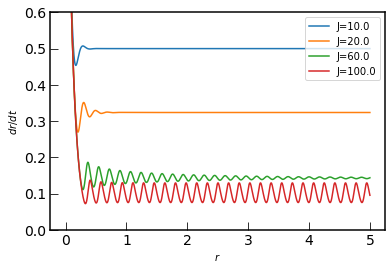

In [6]:
# retourne le côté droit de l'équation différentielle 
def rhs(x,xD,dt):
    courant = I-j*xD
    dxdt = -x + rmax/(1.+np.exp(-beta*(courant-T)))
    return dxdt

# paramètres du modèle neuronal
I = 15.
beta = 0.5
rmax = 1.
T = 10.
tau = 0.1
D = 0.05
J = [10.,20.,60.,100.]

# paramètres d'intégration numérique
dt = 0.0001 # pas d'intégration
Ttotal  = 5. # durée totale en secondes
r0 = 1.
DN = int(D/dt)


# vectoriel temporel avec une largeur de pas de 0,1 ms 
t = np.linspace(0.,Ttotal,int(Ttotal/dt) + 1)
r = np.zeros((len(J),len(t)))

for n in range(len(J)):
    j = J[n]
    r[n,0] = r0
    for i in range(0,len(t)-1):
        r[n,i+1] = r[n,i] + rhs(r[n,i],np.where((i-DN)>0,r[n,i-DN],0.),dt)*dt/tau
        
        
for n in range(len(J)):
    plt.plot(t,r[n],label='J=%s'% J[n])

plt.legend(loc=1)

plt.ylabel('$dr/dt$')
plt.xlabel('$r$')
plt.ylim(0,0.6)

Oscillation atténuée pour $J<100$, et oscillation continue pour $J \geq 100$. 

## 4. Réseau de neurones inhibiteurs d'Integrate-and-Fire à faible connexion

Dynamique d'un réseau de neurones inhibiteurs d'Integrate-and-Fire faiblement connectés. Les neurones individuels tirent irrégulièrement à faible taux, mais le réseau est soumis à un régime d'activité global oscillatoire où les neurones sont faiblement synchronisés.

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


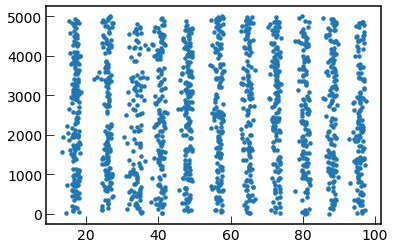

In [7]:
from brian2 import *
%matplotlib inline
# paramètres réseau
N = 5000
Vr = 10 * mV
theta = 20 * mV
tau = 20 * ms
delta = 2 * ms
taurefr = 2 * ms
duration = .1 * second
C = 1000
sparseness = float(C)/N
J = 0.1 * mV
muext = 25 * mV
sigmaext = 1 * mV
# modèle neuronal
eqs = "dv/dt=(-v+muext+sigmaext*sqrt(tau)*xi)/tau : volt"
group = NeuronGroup(N, eqs, threshold='v>theta', reset='v=Vr', refractory=taurefr)
group.v = Vr
# Connections
conn = Synapses(group, group, on_pre='v-=J',delay=delta)
conn.connect(p=sparseness)
# Moniteurs
M = SpikeMonitor(group)
#  
run(duration)
# Tracer
plot(M.t/ms, M.i, '.')
show()